## Notebook to know how to get and extract images and spectra from SDSS (Sloan Sky Digital Survey) using the astropy and astroquery libraries.

In [1]:
####### To use this notebook and do the work of the lecture, it is necessary to install:
######     numpy           (probably already install)
######     matplotlib      (probably already install)
######     astropy
######     astroquery       
###### you could do : $conda install -c astropy astroquery

from astroquery.sdss import SDSS      
from astropy import coordinates as coords
import astropy.units as u
from astropy.io import fits
### import the matplotlib library we need to do the plots
import matplotlib.pyplot as plt
### command specific to notebooks to force the plots to be include in the below part of each instruction block
%matplotlib inline
import numpy as np



/usr/lib/python2.7/dist-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


### Get the ID of SDSS targets for which there is a spectrum

In [2]:
##### if we use another system than the RA DEC in degrees, we have to convert it using this function
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')

##### Request to obtain the ID list of objects with a spectrum in the direction of "pos" (ra des in degrees)
##### in the radius given in "arcsecond or arcminute" unit (reason why we use u.arcsec or u.arcsec, if not the
##### the query system refuse to interpret it and return an error
ixid = SDSS.query_region(pos, spectro=True, radius=5*u.arcmin)
ph = SDSS.query_region(pos, spectro=True, radius=5*u.arcmin, photoobj_fields=['modelMag_g','modelMag_r' ,'modelMag_i'])

#### http://cas.sdss.org/dr7/en/help/browser/description.asp?n=PhotoObj&t=V
print(ixid)
print(ph)

      ra           dec             objid        ... run2d  instrument
------------- ------------- ------------------- ... ------ ----------
2.09108576761  14.805558039 1237652943176204413 ...     26       SDSS
2.01642430111 14.8109891231 1237652943176139005 ...     26       SDSS
1.95947794409 14.7610869898 1237656495114485963 ...     26       SDSS
2.07666156507 14.8434552911 1237652943176204410 ... v5_7_0       BOSS
2.03328552315 14.7810481229 1237652943176139448 ... v5_7_0       BOSS
2.02344596303 14.8398237521 1237652943176138868 ...     26       SDSS
2.02276620967 14.8881787601 1237652943176139008 ...     26       SDSS
modelMag_g modelMag_r modelMag_i
---------- ---------- ----------
  18.41279   17.38145   16.92674
  21.44598   21.15843   21.03339
  18.79664   17.66721   17.17797
  16.03478   15.29446   14.88543
  18.71897    17.3691   16.73282
  19.47589   19.11505   19.00153
  17.65675   16.72396   16.22803


### Check what it is in the request return

In [3]:
##### Print the informations we get from the previous request. Each ixid[ii] is an ID object 
##### that we will use to get the image and spectra further in the code.
##### MORE IMPORTANT, ixid by itself is a self consistent astropy.table
##### We have to use the all content of the table when we will ask for 

print type(ixid)

for ii in range(len(ixid)):
    print ixid[ii]
    

<class 'astropy.table.table.Table'>
      ra          dec             objid        run  rerun camcol field     z     plate  mjd  fiberID     specobjid      run2d instrument
------------- ------------ ------------------- ---- ----- ------ ----- --------- ----- ----- ------- ------------------ ----- ----------
2.09108576761 14.805558039 1237652943176204413 1739   301      3   316 0.1430516   752 52251     301 846759505961183232    26       SDSS
      ra           dec             objid        run  rerun camcol field     z     plate  mjd  fiberID     specobjid      run2d instrument
------------- ------------- ------------------- ---- ----- ------ ----- --------- ----- ----- ------- ------------------ ----- ----------
2.01642430111 14.8109891231 1237652943176139005 1739   301      3   315 0.1135348   752 52251     302 846759780839090176    26       SDSS
      ra           dec             objid        run  rerun camcol field     z     plate  mjd  fiberID     specobjid      run2d instrument
-

### Get the spectra and images for the IDs we get with the request

In [4]:
#### We ask to get the spectra of all the list of objects from the table 
#### All the spectra are download in the object "sp". We will see how to get the 
#### relevant information from it in the next part

sp = SDSS.get_spectra(matches=ixid)

#### We ask to the image containing the objects of th list
im_g = SDSS.get_images(matches=ixid, band='g')
im_r = SDSS.get_images(matches=ixid, band='r')
im_i = SDSS.get_images(matches=ixid, band='i')

### Extract and plot the images

<SkyCoord (ICRS): (ra, dec) in deg
    ( 2.02345833,  14.83980556)>


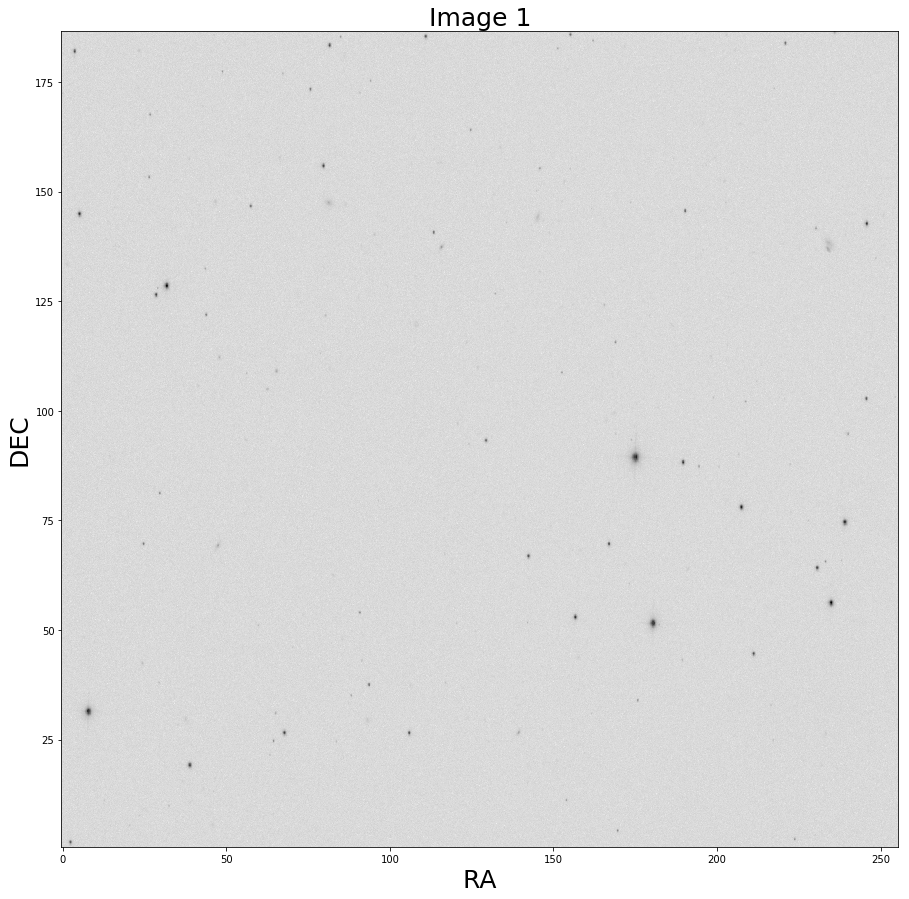

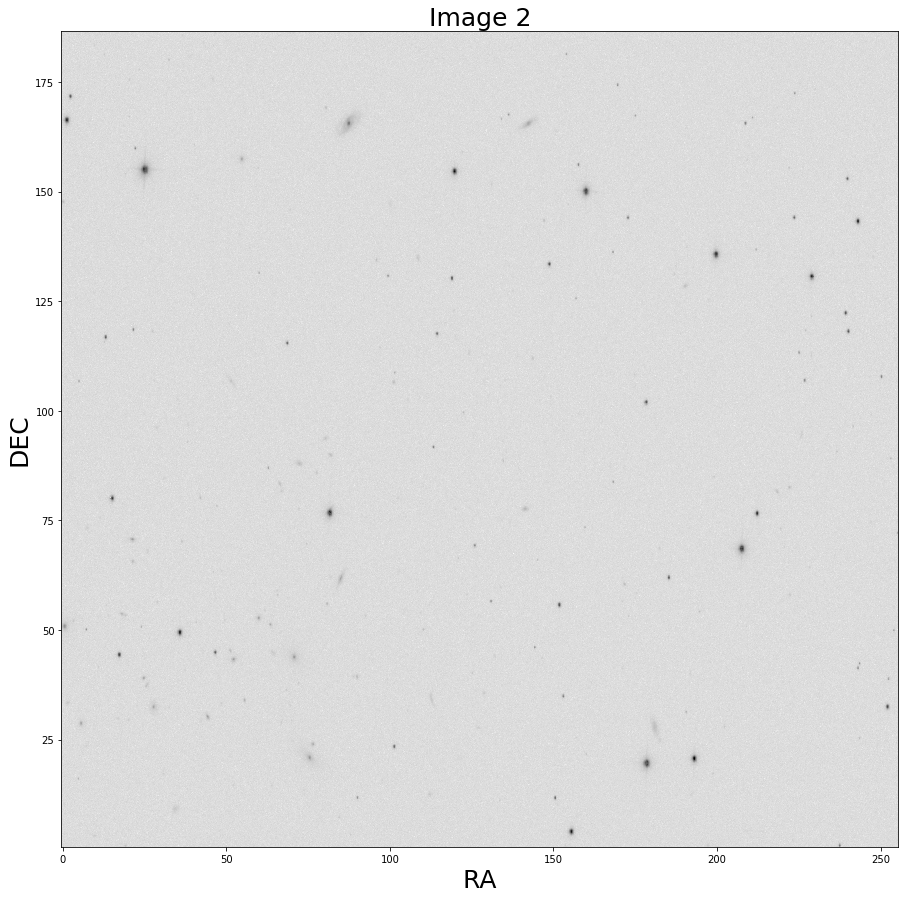

In [5]:
##### In most of the cases, the object we will request will be in the same plate (i.e same photography)
##### but the request return the same number of images than the length of "idix"

image1 = im_g[0]['PRIMARY'].data
image2 = im_g[1]['PRIMARY'].data

##### part to get the informations over the axes
tmp1 = im_g[0][2].data
print(pos)
tmp1 = tmp1[0]
eje_x = tmp1[1]
eje_y = tmp1[2]


fig = plt.figure(figsize=(15,15))
plt.pcolormesh( eje_x, eje_y, (image1- np.min(image1)+0.01)**0.001, cmap='Greys' )
plt.title('Image 1', fontsize=25)
plt.xlabel('RA', fontsize=25)
plt.ylabel('DEC', fontsize=25)
plt.show()

fig = plt.figure(figsize=(15,15))
plt.pcolormesh( eje_x, eje_y, (image2- np.min(image2)+0.01)**0.001, cmap='Greys' )
plt.title('Image 2', fontsize=25)
plt.xlabel('RA', fontsize=25)
plt.ylabel('DEC', fontsize=25)
plt.show()



##### We can see that the 2 images are indentical in this example


### Test to do a RGB composit image

In [32]:
import astropy as ap

import numpy as np
import matplotlib.pyplot as plt
#from astropy.io.fits import hdu

im_g[0].info()


print sp[0].info()

test = sp[0]['PRIMARY']
data_g = im_g[0]['PRIMARY'].data
data_r = im_r[0]['PRIMARY'].data
data_i = im_i[0]['PRIMARY'].data




print data_g.shape

test_image = np.zeros( ((data_g.shape)[0],(data_g.shape)[1],3)  )

test_image[:,:,0] = ((data_g-np.min(data_g)+.3)**(0.1))/np.max(((data_g-np.min(data_g)+.3)**(0.1)))
test_image[:,:,1] = ((data_r-np.min(data_r)+.3)**(0.1))/np.max(((data_r-np.min(data_r)+.3)**(0.1)))
test_image[:,:,2] = ((data_i-np.min(data_i)+.3)**(0.1))/np.max(((data_i-np.min(data_i)+.3)**(0.1)))

test_image[:,:,0] = (data_g)
test_image[:,:,1] = (data_r)
test_image[:,:,2] = (data_i)

fig = plt.figure(figsize=(25, 20)) 
#plt.pcolormesh((data-np.min(data)+.1)**(0.1), cmap='Blues')
#plt.pcolormesh((data_r-np.min(data_r)+.1)**(0.1), cmap='Greens')
#plt.pcolormesh((data_i-np.min(data_i)+.1)**(0.1), cmap='Reds')
plt.imshow(test_image)
plt.show()


#print data

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   ['49152E', '2048E', '1489E']   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3809R x 8C   ['E', 'E', 'E', 'J', 'J', 'E', 'E', 'E']   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, 

ValueError: Floating point image RGB values must be in the 0..1 range.

In [25]:
((data_i-np.min(data_i)+.3)**(0.1))/np.max(((data_i-np.min(data_i)+.3)**(0.1)))

array([[ 0.52910006,  0.54698658,  0.54357499, ...,  0.54003733,
         0.54362762,  0.53815258],
       [ 0.53478038,  0.5453099 ,  0.53742874, ...,  0.54535085,
         0.53351593,  0.53751189],
       [ 0.5387094 ,  0.53996462,  0.53677648, ...,  0.53069741,
         0.53941375,  0.53815258],
       ..., 
       [ 0.53056645,  0.53611255,  0.54118866, ...,  0.53878081,
         0.53685945,  0.54591113],
       [ 0.53870368,  0.52908665,  0.53677058, ...,  0.53940809,
         0.54303503,  0.53750753],
       [ 0.53611183,  0.5417887 ,  0.52280772, ...,  0.54477501,
         0.53350967,  0.53620422]], dtype=float32)

In [35]:
np.min(((data_g-np.min(data_g)+.3)**(0.1))/np.max(((data_g-np.min(data_g)+.3)**(0.1))))

0.54515463

In [36]:
np.min(((data_r-np.min(data_r)+.3)**(0.1))/np.max(((data_r-np.min(data_r)+.3)**(0.1))))

0.51781797

In [26]:
((data_i-np.min(data_i)+.3)**(0.1))

array([[ 0.92936039,  0.96077788,  0.95478541, ...,  0.94857156,
         0.95487791,  0.94526106],
       [ 0.93933779,  0.95783281,  0.94398963, ...,  0.95790476,
         0.9371168 ,  0.94413567],
       [ 0.94623911,  0.94844389,  0.94284397, ...,  0.93216604,
         0.94747627,  0.94526106],
       ..., 
       [ 0.93193609,  0.94167775,  0.95059383, ...,  0.94636446,
         0.94298965,  0.95888889],
       [ 0.94622904,  0.92933679,  0.9428336 , ...,  0.94746637,
         0.95383704,  0.94412798],
       [ 0.9416765 ,  0.95164788,  0.9183079 , ...,  0.95689327,
         0.93710583,  0.9418388 ]], dtype=float32)

In [38]:
np.min(((data_i-np.min(data_i)+.3)**(0.1))/np.max(((data_i-np.min(data_i)+.3)**(0.1))))

0.50473773

### Extract and plot the spectra

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3809R x 8C   ['E', 'E', 'E', 'J', 'J', 'E', 'E', 'E']   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B1-00012109-00012113-00012114    1 BinTableHDU    146   2033R x 7C   [E, E, E, J, E, E, E]   
  5  B1-00012110-00012113-000

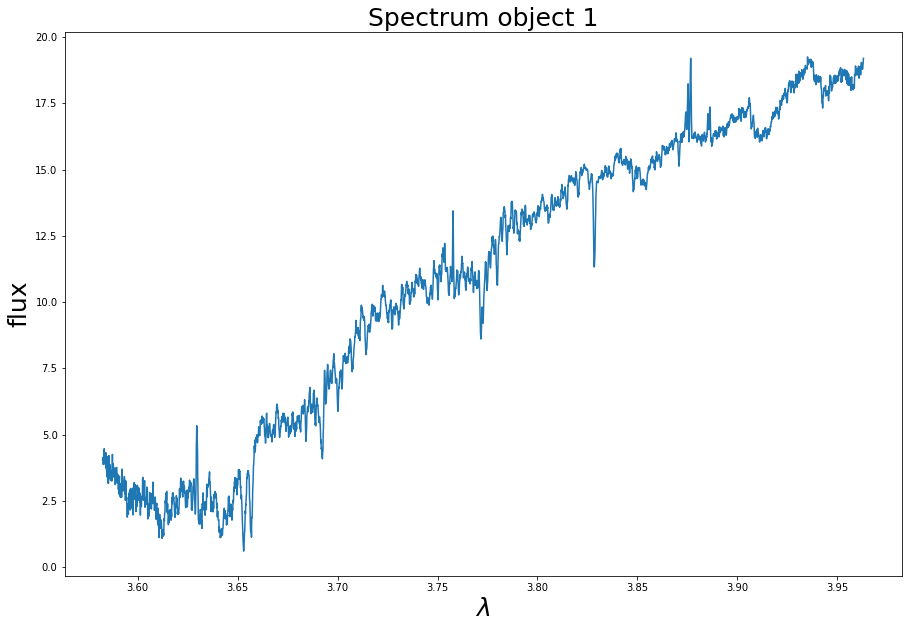

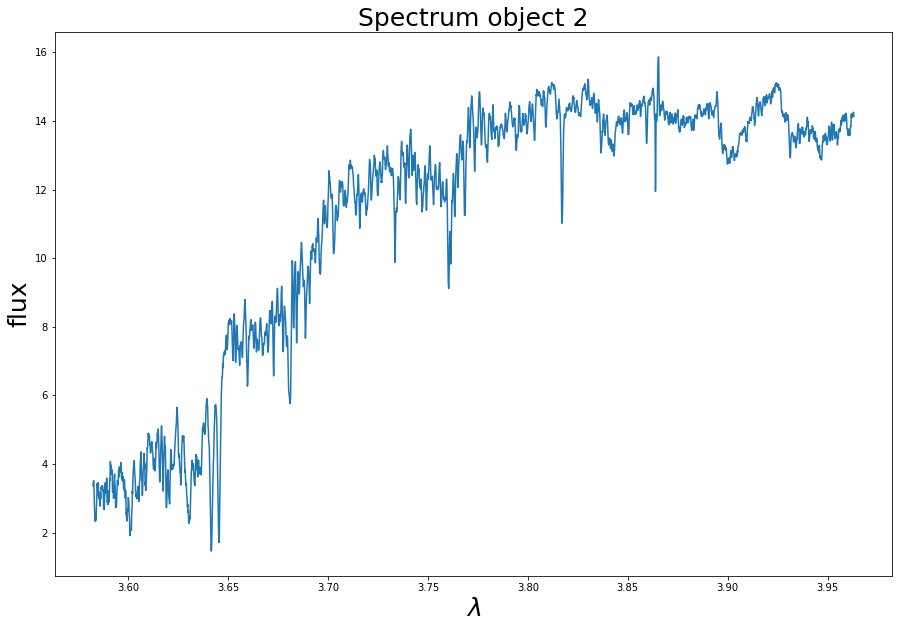

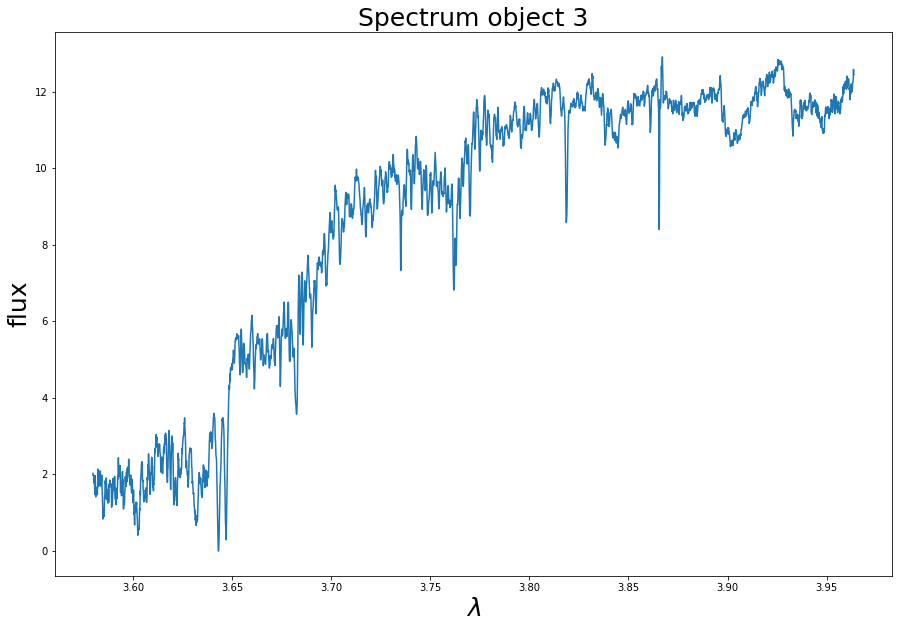

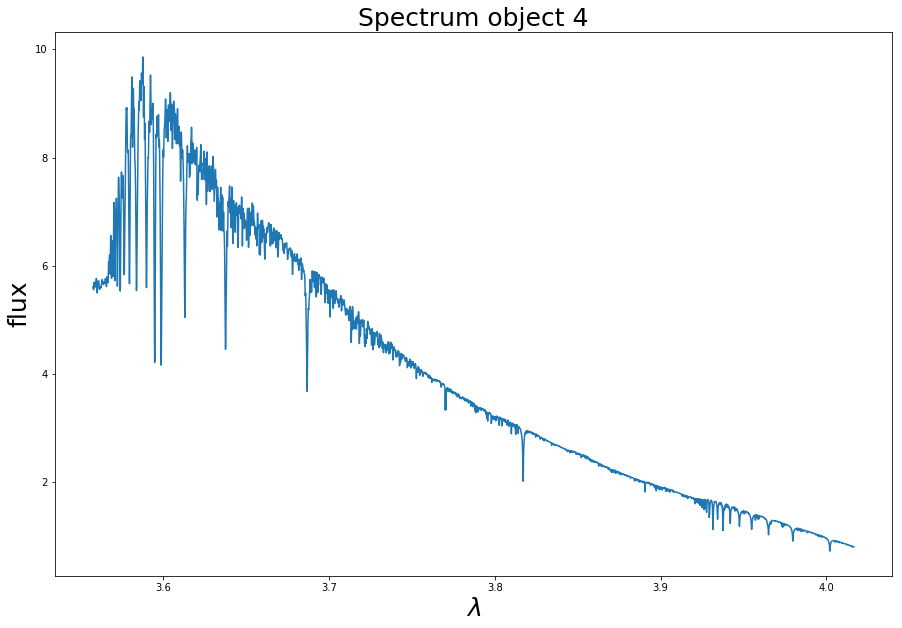

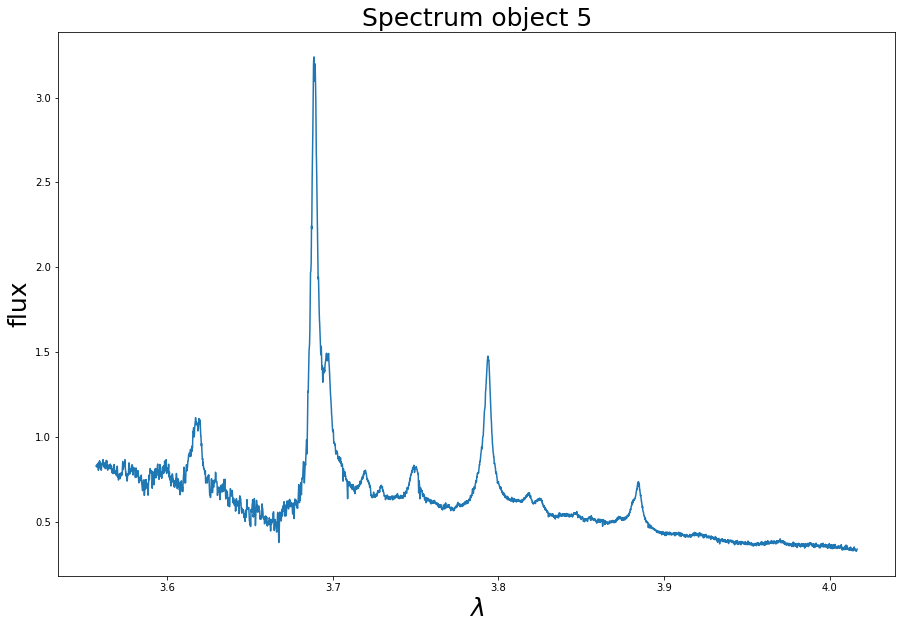

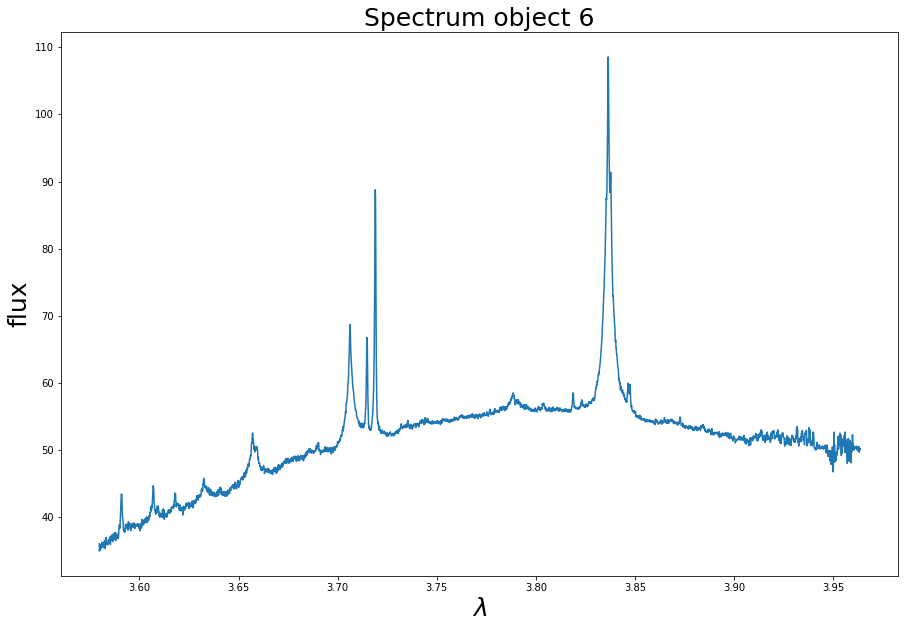

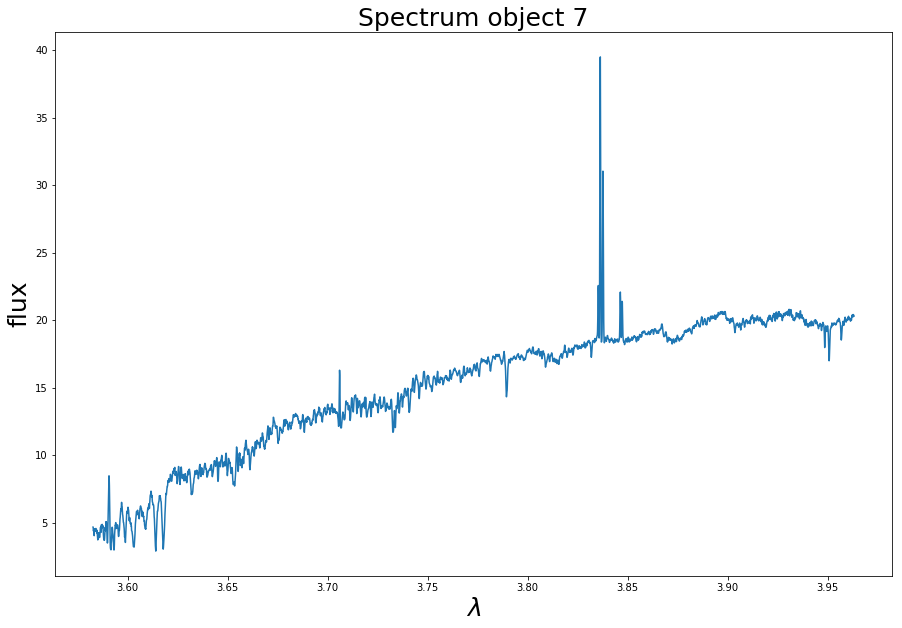

In [7]:
#print sp[0].info()
for ii in range(len(ixid)):

    #spectre = sp[ii]['COADD']
    data_spec = sp[ii]['COADD'].data


    if ii == 0 : 
        print sp[ii].info()
        print data_spec.shape

    arr_spec = np.zeros(data_spec.shape)
    arr_lambda = np.zeros(data_spec.shape)

    for jj in range((data_spec.shape)[0]):
        arr_spec[jj] = data_spec[jj][7]
        arr_lambda[jj] = data_spec[jj][1]


    fig = plt.figure(figsize=(15,10))
    plt.plot(arr_lambda, arr_spec)
    plt.title('Spectrum object '+str(ii+1), fontsize=25)
    plt.xlabel(r'$\lambda$', fontsize=25)
    plt.ylabel('flux', fontsize=25)
    #plt.savefig('Spectrum.png')
    plt.show()



In [8]:
print ixid[0]['objid']
ph = SDSS.query_photoobj(ixid[0]['objid'])

1237652943176204413


In [9]:
ph = SDSS.query_crossid(pos, radius=2*u.arcmin, photoobj_fields=['modelMag_g', 'modelMag_i'])


In [10]:
print ph[0]['modelMag_g']
print ph[0]['modelMag_i']

16.03478
14.88543
